In [1]:
include("speciale_tools.jl")
import JLD
import PyPlot

In [2]:
ndimage = PyCall.pyimport("scipy.ndimage");
rasterio = PyCall.pyimport("rasterio");
function _load_scalgo(depth_path, lake_path, geo_lut; scalgo_fill = -10, resample_fill=-100)
    
    ### Water depths
    depth_tiff = rasterio.open(depth_path);
    transform1 = depth_tiff.get_transform()
    scalgo_depth = depth_tiff.read(1);
    # Set new negative values    
    scalgo_depth[scalgo_depth .<0] .= scalgo_fill
    ## Resample 
    idx1 = reshape((geo_lut["latitude"].-transform1[4])./(transform1[6]),:);
    idx2 = reshape((geo_lut["longitude"].-transform1[1])./transform1[2],:);
    index = [idx1,idx2];
    flood_val  = ndimage.map_coordinates(scalgo_depth, index, order=1, mode="constant",cval=resample_fill);
    flood_val = reshape(flood_val,size(geo_lut["latitude"]));
    
    
    ### Lakes
    lakes_tiff = rasterio.open(lake_path);
    transform2 = lakes_tiff.get_transform()
    scalgo_lakes = lakes_tiff.read(1);
    # Set new negative values    
    scalgo_lakes[scalgo_lakes .<0] .= scalgo_fill
    # Resample 
    idx1 = reshape((geo_lut["latitude"].-transform2[4])./(transform2[6]),:);
    idx2 = reshape((geo_lut["longitude"].-transform2[1])./transform2[2],:);
    index = [idx1,idx2];
    lakes = ndimage.map_coordinates(scalgo_lakes, index, order=1, mode="constant",cval=resample_fill);
    lakes  = reshape(lakes ,size(geo_lut["latitude"]));
    
    
    return flood_val, lakes
end


function _count_mat(VV_flood,VH_flood,flood_val,lakes)
    
    scalgo_mask = flood_val .> -50;
    flood_mask = flood_val .> 0.15
    lake_mask = lakes .> 0.5;
    
    names = ["VV","VH","Scalgo no lake", "lake", "Scalgo raw"]
    data = [VV_flood, VH_flood, flood_mask .& .!(lake_mask), lake_mask , flood_mask];
    count_mat = [ sum((data[i] .& data[j])[scalgo_mask]) for i=1:length(data),j=1:length(data)]
    
    total_count = sum(scalgo_mask)
    
    freq_mat = zeros(size(count_mat))
    [freq_mat[j,:] .= count_mat[j,:]./ count_mat[j,j] for j=1:length(data)]
    
    return count_mat, freq_mat, total_count, names
end
    

_count_mat (generic function with 1 method)

# Vejle 

In [3]:
data_folder= "/home/data/simon/processed/test_areas/vejle_new"

flood_mask_folder = "/home/data/simon/result/HSBA_loss2/HSBA_vejle"

"/home/data/simon/result/HSBA_loss2/HSBA_vejle"

In [8]:
geo_lut = JLD.load(joinpath(data_folder ,"coordinates.jld"));

###  Vejle 1

In [9]:
scalgo_folder = "/home/data/simon/result/scalgo/vejle_1"

"/home/data/simon/result/scalgo/vejle_1"

In [10]:
flood_val, lakes =  _load_scalgo(
                                joinpath(scalgo_folder,"vanddybde_vejle1.tif"), 
                                joinpath(scalgo_folder,"geo_dk_lakes_vejle1.tif"),
                                geo_lut);
scalgo_mask = flood_val .> -50;
flood_mask = (flood_val .> 0.15) .& (flood_val .< 0.15)a


OutOfMemoryError: OutOfMemoryError()

In [ ]:

scalgo_mask = flood_val .> -50;
flood_mask = flood_val .> 0.15
lake_mask = lakes .> 0.5;
    

In [39]:
count_mat_v1, freq_mat_v1,
total_count_v1, names =_count_mat(VV_flood,VH_flood,
                                flood_val,lakes)
names

5-element Array{String,1}:
 "VV"            
 "VH"            
 "Scalgo no lake"
 "lake"          
 "Scalgo raw"    

In [40]:
count_mat_v1[1:3,1:3]

3×3 Array{Int64,2}:
 312   8   33
   8  85   57
  33  57  974

In [41]:
freq_mat_v1[1:3,1:3] * 100

3×3 Array{Float64,2}:
 100.0        2.5641    10.5769
   9.41176  100.0       67.0588
   3.38809    5.85216  100.0   

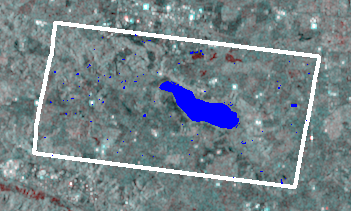

In [42]:
zoom_view = [140:350,1150:1500]
imgVV = pretty_img(VV,min_vv,max_vv)
subset_edges = get_edges(flood_val .> -50,1);
test_1 = add_mask(imgVV,subset_edges,(1,1,1))
add_mask(test_1,(lakes .> 0) ,(0,0,1))[zoom_view...]

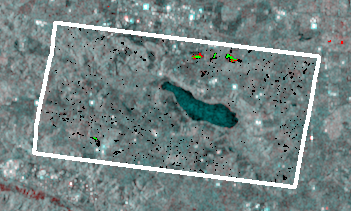

In [43]:
test = add_mask(imgVV,(flood_val .> 0.15) .& VH_flood,(0,1,0))
test = add_mask(test,(flood_val .> 0.15) .& (VH_flood.==false) .& (lakes .< 0.5),(0,0,0))
test = add_mask(test,(flood_val .< 0.15) .& VH_flood,(1,0,0) )
add_mask(test,subset_edges,(1,1,1))[zoom_view...]


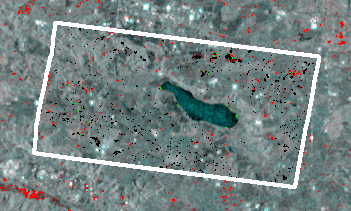

In [44]:
test = add_mask(imgVV,(flood_val .> 0.15) .& VV_flood,(0,1,0))
test = add_mask(test,(flood_val .> 0.15) .& (VV_flood.==false) .& (lakes .< 0.5),(0,0,0))
test = add_mask(test,(flood_val .< 0.15) .& VV_flood,(1,0,0) )
add_mask(test,subset_edges,(1,1,1))[zoom_view...]

### Vejle 2

In [45]:
scalgo_folder = "/home/data/simon/result/scalgo/vejle2"

"/home/data/simon/result/scalgo/vejle2"

In [46]:
flood_val, lakes =  _load_scalgo(
                                joinpath(scalgo_folder,"flood.tif"), 
                                joinpath(scalgo_folder,"lakes_vejle2.tif"),
                                geo_lut);
    

In [47]:
count_mat_v2, freq_mat_v2,
total_count_v2, names =_count_mat(VV_flood,VH_flood,
                                flood_val,lakes)
names

5-element Array{String,1}:
 "VV"            
 "VH"            
 "Scalgo no lake"
 "lake"          
 "Scalgo raw"    

In [48]:
count_mat_v2[1:3,1:3]

3×3 Array{Int64,2}:
 672   19   190
  19  112    95
 190   95  1915

In [53]:
freq_mat_v2[1:3,1:3]*100

3×3 Array{Float64,2}:
 100.0        2.82738   28.2738
  16.9643   100.0       84.8214
   9.92167    4.96084  100.0   

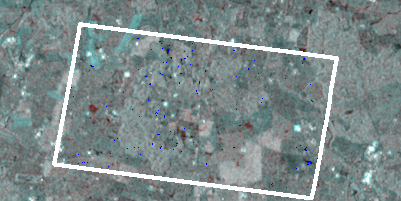

In [50]:
zoom_view = [600:800,800:1200]
imgVV = pretty_img(VV,min_vv,max_vv)
subset_edges = get_edges(flood_val .> -50,1);
test_1 = add_mask(imgVV,subset_edges,(1,1,1))
add_mask(test_1,(lakes .> 0) ,(0,0,1))[zoom_view...]

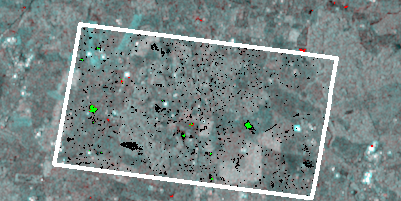

In [51]:
test = add_mask(imgVV,(flood_val .> 0.15) .& VH_flood,(0,1,0))
test = add_mask(test,(flood_val .> 0.15) .& (VH_flood.==false) .& (lakes .< 0.5),(0,0,0))
test = add_mask(test,(flood_val .< 0.15) .& VH_flood,(1,0,0) )
add_mask(test,subset_edges,(1,1,1))[zoom_view...]


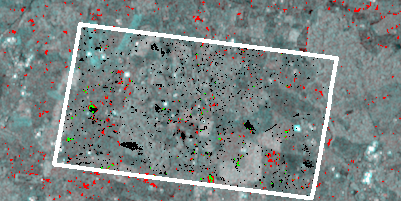

In [52]:
test = add_mask(imgVV,(flood_val .> 0.15) .& VV_flood,(0,1,0))
test = add_mask(test,(flood_val .> 0.15) .& (VV_flood.==false) .& (lakes .< 0.5),(0,0,0))
test = add_mask(test,(flood_val .< 0.15) .& VV_flood,(1,0,0) )
add_mask(test,subset_edges,(1,1,1))[zoom_view...]

### Vejle 3

In [56]:
scalgo_folder = "/home/data/simon/result/scalgo/vejle3"

"/home/data/simon/result/scalgo/vejle3"

In [57]:
flood_val, lakes =  _load_scalgo(
                                joinpath(scalgo_folder,"flood.tif"), 
                                joinpath(scalgo_folder,"lakes_vejle3.tif"),
                                geo_lut);
    

In [58]:
count_mat_v3, freq_mat_v3,
total_count_v3, names =_count_mat(VV_flood,VH_flood,
                                flood_val,lakes)
names

5-element Array{String,1}:
 "VV"            
 "VH"            
 "Scalgo no lake"
 "lake"          
 "Scalgo raw"    

In [59]:
count_mat_v3[1:3,1:3]

3×3 Array{Int64,2}:
 914   20    1
  20  582    1
   1    1  141

In [60]:
freq_mat_v3[1:3,1:3]*100

3×3 Array{Float64,2}:
 100.0        2.18818    0.109409
   3.43643  100.0        0.171821
   0.70922    0.70922  100.0     

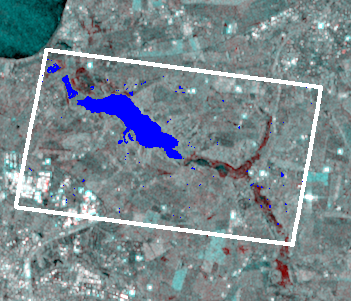

In [61]:
zoom_view = [500:800,300:650]
imgVV = pretty_img(VV,min_vv,max_vv)
subset_edges = get_edges(flood_val .> -50,1);
test_1 = add_mask(imgVV,subset_edges,(1,1,1))
add_mask(test_1,(lakes .> 0) ,(0,0,1))[zoom_view...]

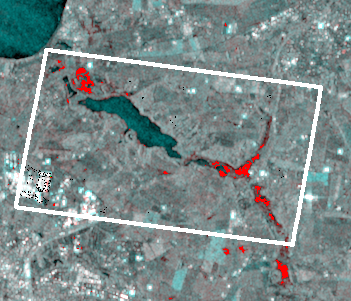

In [62]:
test = add_mask(imgVV,(flood_val .> 0.15) .& VH_flood,(0,1,0))
test = add_mask(test,(flood_val .> 0.15) .& (VH_flood.==false) .& (lakes .< 0.5),(0,0,0))
test = add_mask(test,(flood_val .< 0.15) .& VH_flood,(1,0,0) )
add_mask(test,subset_edges,(1,1,1))[zoom_view...]


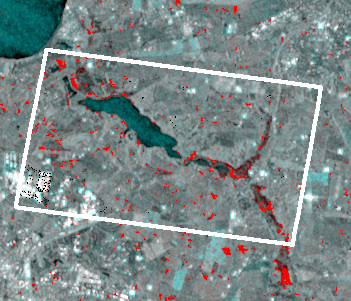

In [63]:
test = add_mask(imgVV,(flood_val .> 0.15) .& VV_flood,(0,1,0))
test = add_mask(test,(flood_val .> 0.15) .& (VV_flood.==false) .& (lakes .< 0.5),(0,0,0))
test = add_mask(test,(flood_val .< 0.15) .& VV_flood,(1,0,0) )
add_mask(test,subset_edges,(1,1,1))[zoom_view...]

# Ribe

In [64]:
data_folder= "/home/data/simon/processed/test_areas/ribe_new"

flood_mask_folder = "/home/data/simon/result/HSBA_loss2/HSBA_ribe"

"/home/data/simon/result/HSBA_loss2/HSBA_ribe"

In [65]:
VV_flood = JLD.load(joinpath(flood_mask_folder,"VV_flood_mask.jld"),"data")[end:-1:1,:];
VH_flood = JLD.load(joinpath(flood_mask_folder,"VH_flood_mask.jld"),"data")[end:-1:1,:];
geo_lut = JLD.load(joinpath(data_folder ,"coordinates.jld"));

In [66]:
VV = [JLD.load(joinpath(data_folder,"flood/VV_co.jld"),"data"),
    JLD.load(joinpath(data_folder,"flood/VV_pre_median.jld"),"data")]


VH = [JLD.load(joinpath(data_folder,"flood/VH_co.jld"),"data"), 
    JLD.load(joinpath(data_folder,"flood/VH_pre_median.jld"),"data")];

### Ribe 1

In [67]:
scalgo_folder = "/home/data/simon/result/scalgo/ribe1"

"/home/data/simon/result/scalgo/ribe1"

In [68]:
flood_val, lakes =  _load_scalgo(
                                joinpath(scalgo_folder,"flood.tif"), 
                                joinpath(scalgo_folder,"lakes_ribe1.tif"),
                                geo_lut);
    

In [69]:
count_mat_r1, freq_mat_r1,
total_count_r1, names =_count_mat(VV_flood,VH_flood,
                                flood_val,lakes)
names

5-element Array{String,1}:
 "VV"            
 "VH"            
 "Scalgo no lake"
 "lake"          
 "Scalgo raw"    

In [70]:
count_mat_r1[1:3,1:3]

3×3 Array{Int64,2}:
 8151  6654   281
 6654  7029   252
  281   252  1255

In [71]:
freq_mat_r1[1:3,1:3]

3×3 Array{Float64,2}:
 1.0       0.816342  0.0344743
 0.94665   1.0       0.0358515
 0.223904  0.200797  1.0      

In [72]:
zoom_view = [650:840,200:500];

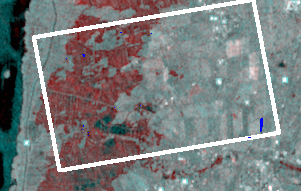

In [73]:

imgVV = pretty_img(VV,min_vv,max_vv)
subset_edges = get_edges(flood_val .> -50,1);
test_1 = add_mask(imgVV,subset_edges,(1,1,1))
add_mask(test_1,(lakes .> 0) ,(0,0,1))[zoom_view...]

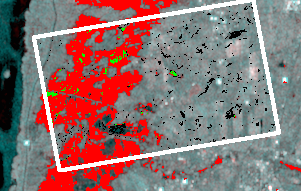

In [74]:
test = add_mask(imgVV,(flood_val .> 0.15) .& VH_flood,(0,1,0))
test = add_mask(test,(flood_val .> 0.15) .& (VH_flood.==false) .& (lakes .< 0.5),(0,0,0))
test = add_mask(test,(flood_val .< 0.15) .& VH_flood,(1,0,0) )
add_mask(test,subset_edges,(1,1,1))[zoom_view...]


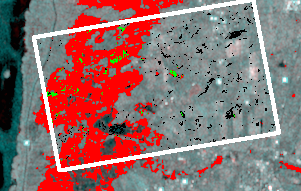

In [75]:
test = add_mask(imgVV,(flood_val .> 0.15) .& VV_flood,(0,1,0))
test = add_mask(test,(flood_val .> 0.15) .& (VV_flood.==false) .& (lakes .< 0.5),(0,0,0))
test = add_mask(test,(flood_val .< 0.15) .& VV_flood,(1,0,0) )
add_mask(test,subset_edges,(1,1,1))[zoom_view...]

### Ribe 2

In [76]:
scalgo_folder = "/home/data/simon/result/scalgo/ribe2"

"/home/data/simon/result/scalgo/ribe2"

In [77]:
flood_val, lakes =  _load_scalgo(
                                joinpath(scalgo_folder,"flood.tif"), 
                                joinpath(scalgo_folder,"lakes_ribe2.tif"),
                                geo_lut);
    

In [78]:
count_mat_r2, freq_mat_r2,
total_count_r2, names =_count_mat(VV_flood,VH_flood,
                                flood_val,lakes)
names

5-element Array{String,1}:
 "VV"            
 "VH"            
 "Scalgo no lake"
 "lake"          
 "Scalgo raw"    

In [87]:
count_mat_r2[1:3,1:3]

3×3 Array{Int64,2}:
 1932  1087   306
 1087  1134   133
  306   133  1049

In [88]:
freq_mat_r2[1:3,1:3]

3×3 Array{Float64,2}:
 1.0       0.562629  0.158385
 0.958554  1.0       0.117284
 0.291706  0.126787  1.0     

In [81]:
zoom_view = [1000:1240,150:400];

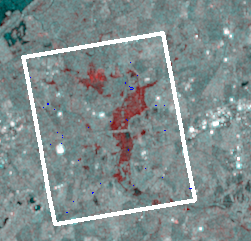

In [82]:

imgVV = pretty_img(VV,min_vv,max_vv)
subset_edges = get_edges(flood_val .> -50,1);
test_1 = add_mask(imgVV,subset_edges,(1,1,1))
add_mask(test_1,(lakes .> 0) ,(0,0,1))[zoom_view...]

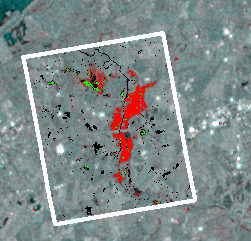

In [83]:
test = add_mask(imgVV,(flood_val .> 0.15) .& VH_flood,(0,1,0))
test = add_mask(test,(flood_val .> 0.15) .& (VH_flood.==false) .& (lakes .< 0.5),(0,0,0))
test = add_mask(test,(flood_val .< 0.15) .& VH_flood,(1,0,0) )
add_mask(test,subset_edges,(1,1,1))[zoom_view...]


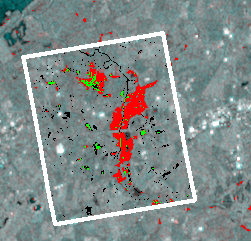

In [84]:
test = add_mask(imgVV,(flood_val .> 0.15) .& VV_flood,(0,1,0))
test = add_mask(test,(flood_val .> 0.15) .& (VV_flood.==false) .& (lakes .< 0.5),(0,0,0))
test = add_mask(test,(flood_val .< 0.15) .& VV_flood,(1,0,0) )
add_mask(test,subset_edges,(1,1,1))[zoom_view...]

### Ribe 3

In [89]:
scalgo_folder = "/home/data/simon/result/scalgo/ribe3"

"/home/data/simon/result/scalgo/ribe3"

In [90]:
flood_val, lakes =  _load_scalgo(
                                joinpath(scalgo_folder,"flood.tif"), 
                                joinpath(scalgo_folder,"lakes_ribe3.tif"),
                                geo_lut);
    

In [91]:
count_mat_r3, freq_mat_r3,
total_count_r3, names =_count_mat(VV_flood,VH_flood,
                                flood_val,lakes)
names

5-element Array{String,1}:
 "VV"            
 "VH"            
 "Scalgo no lake"
 "lake"          
 "Scalgo raw"    

In [94]:
count_mat_r3[1:3,1:3]

3×3 Array{Int64,2}:
 4277  3020   161
 3020  3904   181
  161   181  2021

In [95]:
freq_mat_r3[1:3,1:3]

3×3 Array{Float64,2}:
 1.0        0.706102   0.0376432
 0.773566   1.0        0.0463627
 0.0796635  0.0895596  1.0      

In [96]:
zoom_view = [650:-1:350,400:750];

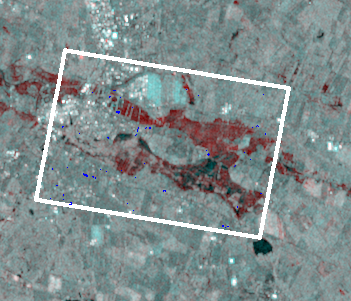

In [97]:

imgVV = pretty_img(VV,min_vv,max_vv)
subset_edges = get_edges(flood_val .> -50,1);
test_1 = add_mask(imgVV,subset_edges,(1,1,1))
add_mask(test_1,(lakes .> 0) ,(0,0,1))[zoom_view...]

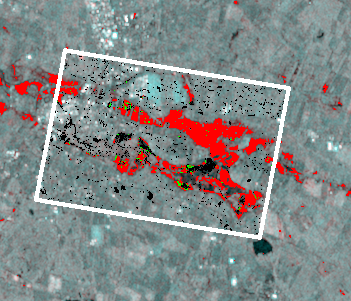

In [98]:
test = add_mask(imgVV,(flood_val .> 0.15) .& VH_flood,(0,1,0))
test = add_mask(test,(flood_val .> 0.15) .& (VH_flood.==false) .& (lakes .< 0.5),(0,0,0))
test = add_mask(test,(flood_val .< 0.15) .& VH_flood,(1,0,0) )
add_mask(test,subset_edges,(1,1,1))[zoom_view...]


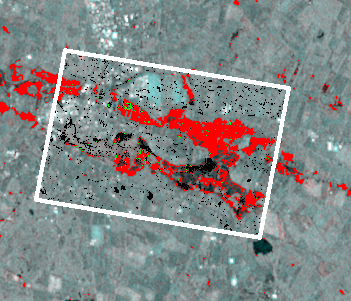

In [99]:
test = add_mask(imgVV,(flood_val .> 0.15) .& VV_flood,(0,1,0))
test = add_mask(test,(flood_val .> 0.15) .& (VV_flood.==false) .& (lakes .< 0.5),(0,0,0))
test = add_mask(test,(flood_val .< 0.15) .& VV_flood,(1,0,0) )
add_mask(test,subset_edges,(1,1,1))[zoom_view...]